In [8]:
%load_ext autoreload
%autoreload 2



from import_file import*


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from nltk.corpus import gutenberg

In [2]:
df_bi = pd.read_pickle('df_bi_A.pkl')

In [24]:
# Specifiying features and labels
X = df_bi['statement'].values
y = df_bi['label'].values

In [25]:
# Specifying train and test split with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0, stratify=y)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

10268 2568
10268 2568


# Word2vec

In [26]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=X_train, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [27]:
len(w2v_model.wv.key_to_index)

91

In [13]:
w2v_model.wv["america"]

KeyError: "Key 'america' not present"

### WOrd2vec end

# Tokenizer

In [28]:
# Tokenizing Text -> Repsesenting each word by a number
# Mapping of orginal word to number is preserved in word_index property of tokenizer

#Tokenized applies basic processing like changing it yo lower case, explicitely setting that as False
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)

In [30]:
# lets check the first 10 words of first news
#every word has been represented with a number
X_train[0][:10]

[7, 208, 324, 640, 1423, 191, 19, 50, 925, 306]

In [31]:
#Lets check few word to numerical replesentation
#Mapping is preserved in dictionary -> word_index property of instance
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break        

the -> 1
in -> 2
of -> 3
to -> 4
a -> 5
and -> 6
says -> 7
for -> 8
that -> 9
is -> 10


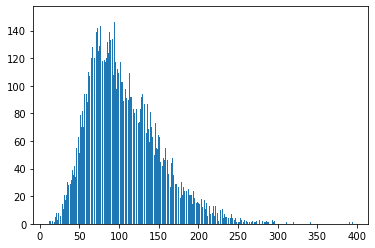

In [32]:
# For determining size of input...

# Making histogram for no of words in news shows that most news article are under 700 words.
# Lets keep each news small and truncate all news to 700 while tokenizing
plt.hist([len(x) for x in X], bins=500)
plt.show()

# Its heavily skewed. There are news with 5000 words? Lets truncate these outliers :) 

In [33]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 700])
# Out of 48k news, 44k have less than 700 words

12836

In [35]:
#Lets keep all news to 700, add padding to news with less than 700 words and truncating long ones
maxlen = 700 

#Making all news of size maxlen defined above
X_train = pad_sequences(X, maxlen=maxlen)

ValueError: invalid literal for int() with base 10: 'Says the Annies List political group supports third-trimester abortions on demand.'

In [36]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [37]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [39]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model.wv, word_index)

KeyError: "Key 'the' not present"

# Using Google

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [6]:
from gensim.models.keyedvectors import KeyedVectors

In [7]:
#invoke garbage collector to free ram
import gc
gc.collect()

22

In [9]:
# Takes RAM 
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
EMBEDDING_DIM=300

In [10]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del word_vectors 

NameError: name 'vocab_size' is not defined